# Project Overview
This is a machine learning model that predicts the Group (machine) and Code (reason) of a downtime event (Z4) based on features such as machine type, machine error code, time of day, machine location etc for a manufacturing plant. The model is trained on historical downtime event data.

### Context
In a manufacturing plant, downtime events are recorded in a database. Each completed downtime event has a Group and Code associated with it. The Group represents the machine that caused the downtime event and the Code represents the reason for the downtime event. The goal of this project is to predict the Group and Code of new downtime event based on the features of the event using machine learning on historical downtime event data.

### Data Preparation

### Data 
- Machine Type
- Error Code
- Time of Day
- Machine Location
- Group
- Code

### Sample Data
We will generate a sample dataset to train, validate and test the model. 
The features will include:
- Machine Type
- Error Code
- Time of Day
- Machine Location
The target variables will be:
- Group
- Code

### Data Preprocessing
- One-hot encoding for categorical features
- Train-test split
- Standardization

### Model
#### Random Forest Classifier


### Evaluation
- Accuracy
- Confusion Matrix


### Deployment
We will develop something simple in python for demonstration purposes. The model will be trained and saved and as the user inputs the features, the model will predict the Group and Code of the downtime event.



## Required Libraries
- pandas
- matplotlib
- seaborn

In [28]:
print("Hello. This is a test to see if code runs!")

Hello. This is a test to see if code runs!


In [29]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn
%pip install graphviz

# optional, for the deployed aoo
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.Collecting sklearn
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'



  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Note: you may need to restart the kernel to use updated packages.


# Data Generation


In [30]:


import pandas as pd
import numpy as np
import random

# Define possible values
machine_types = {
    "Sidel Blowmolder": ["Air System", "Pressure Control", "Feed Section", 
                            "Material Feed", "Mold Alignment", "Cooling System",
                             "Color System", "Labeling Unit", "Filling Station", "Surface Quality"],
    "Krones Blowmolder": ["Air System", "Pressure Control", "Feed Section", 
                            "Material Feed", "Mold Alignment", "Cooling System", 
                             "Color System", "Labeling Unit", "Filling Station", "Surface Quality"],
    
    "Husky Injection Molder": ["Air System", "Pressure Control", "Feed Section",
                                "Material Feed", "Mold Alignment", "Cooling System",
                                "Color System", "Labeling Unit", "Filling Station", "Surface Quality"],
}

issues_by_group = {
    "Air System": (["Low blow air pressure", "High blow air pressure"], [0.8, 0.2]),
    "Pressure Control": (["Low pressure", "High pressure"], [0.6, 0.4]),
    "Feed Section": (["Material Jam", "Material Feed Issue"], [0.7, 0.3]),
    "Material Feed": (["Hopper Jam", "Material Feed Issue"], [0.5, 0.5]),
    "Mold Alignment": (["Mold Misalignment", "Mold Damage"], [0.4, 0.6]),
    "Cooling System": (["Overheat", "Underheat"], [0.6, 0.4]),
    "Color System" : (["Color Change", "Color Mismatch"], [0.6,0.4]),
    "Labeling Unit" : (["Label Misalignment", "Label Tear"], [0.6,0.4]),
    "Filling Station" : (["Overflow", "Underfill"], [0.6,0.4]),
    "Surface Quality" : (["Glue Issue", "Spillage"], [0.6,0.4])
}

# Duration Ranges per Code, minimum and maximum amount of time it can stay down until it's fixed
duration_ranges = {
    "Low Blow Air Pressure": (30, 60),
    "High Blow Air Pressure": (45, 90),
    "Low pressure": (20, 40),
    "High pressure": (25, 50),
    "Material Jam": (15, 30),
    "Material Feed Issue": (20, 35),
    "Hopper Jam": (25, 50),
    "Mold Misalignment": (40, 80),
    "Mold Damage": (80, 150),
    "Overheat": (40, 90),
    "Underheat": (35, 70),
    "Overfill": (15, 30),
    "Underfill": (15, 30),
    "Color Change": (10, 25),
    "Color Mismatch": (20, 40),
    "Label Misalignment": (10, 20),
    "Label Tear": (15, 25),
    "Overflow": (20, 40),
    "Underflow": (15, 30),
    "Glue Issue": (30, 60),
    "Spillage": (25, 50)
}


    


group_to_section = {
    "Air System": "Blowmolder Section",
    "Temperature Control": "Blowmolder Section",
    "Pressure Control": "Blowmolder Section",
    "Feed Section": "Injection Section",
    "Material Feed": "Injection Section",
    "Mold Alignment": "Injection Section",
    "Cooling System": "Injection Section",
    "Color System": "Labeling Unit",
    "Labeling Unit": "Labeling Unit",
    "Filling Station": "Filling Station",
    "Surface Quality": "Filling Station"
}

machine_locations = ["Westland", "Downtown", "Pontiac"]

locations_per_section = {
    "Blowmolder Section": ["Downtown", "Westland"],
    "Injection Section": ["Pontiac"],
    "Labeling Unit": ["Westland"],
    "Filling Station": ["Westland", "Pontiac"]
}


TOTAL_SAMPLES = 15000  # or any number suitable for your needs

data = []

# Function to generate a single problem record
def generate_problem_record():
    machine = random.choice(list(machine_types.keys()))
    group = random.choice(machine_types[machine])
    codes, code_probs = issues_by_group[group]
    code = random.choice(codes)  # Or adjust to balance specific codes

    duration_min, duration_max = duration_ranges.get(code, (20, 60))
    duration = np.random.randint(duration_min, duration_max + 1)

    time_of_day = np.random.randint(0, 24)
    minute = np.random.randint(0, 60)
    start_time = time_of_day * 60 + minute
    end_time = start_time + duration

    section = group_to_section[group]
    location = random.choice(locations_per_section[section])

    record = {
        "MachineType": machine,
        "Group": group,
        "Code": code,
        "Duration": duration,
        "StartTime": start_time,
        "EndTime": end_time,
        "MachineLocation": location,
    }
    return record

# Generate problem samples
for _ in range(TOTAL_SAMPLES):
    data.append(generate_problem_record())

# Create DataFrame and shuffle the data
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data

# Validate distributions
print("\nGroup Distribution:")
print(df['Group'].value_counts())
print("\nCode Distribution:")
print(df['Code'].value_counts())


Group Distribution:
Group
Material Feed       1557
Surface Quality     1524
Labeling Unit       1520
Feed Section        1512
Pressure Control    1509
Color System        1506
Air System          1500
Mold Alignment      1475
Cooling System      1473
Filling Station     1424
Name: count, dtype: int64

Code Distribution:
Code
Material Feed Issue       1528
Label Tear                 786
Material Jam               774
Spillage                   771
Hopper Jam                 767
High pressure              764
Low blow air pressure      756
Color Mismatch             754
Glue Issue                 753
Color Change               752
Low pressure               745
High blow air pressure     744
Overheat                   742
Mold Damage                741
Label Misalignment         734
Mold Misalignment          734
Underheat                  731
Underfill                  723
Overflow                   701
Name: count, dtype: int64


In [31]:
# Summary statistics for numerical features
print(df.describe().round(2))

# Round the count values to the nearest whole number

# Summary for categorical features
categorical_features = ["MachineType", "MachineLocation", "Group", "Code"]
for feature in categorical_features:
    print(f"\nValue counts for {feature}:")
    print(df[feature].value_counts())


       Duration  StartTime   EndTime
count  15000.00   15000.00  15000.00
mean      38.54     715.42    753.96
std       23.68     416.51    417.23
min       10.00       0.00     15.00
25%       23.00     352.00    392.00
50%       32.00     712.00    752.00
75%       46.00    1077.00   1115.00
max      150.00    1439.00   1586.00

Value counts for MachineType:
MachineType
Husky Injection Molder    5033
Krones Blowmolder         5024
Sidel Blowmolder          4943
Name: count, dtype: int64

Value counts for MachineLocation:
MachineLocation
Pontiac     7495
Westland    5996
Downtown    1509
Name: count, dtype: int64

Value counts for Group:
Group
Material Feed       1557
Surface Quality     1524
Labeling Unit       1520
Feed Section        1512
Pressure Control    1509
Color System        1506
Air System          1500
Mold Alignment      1475
Cooling System      1473
Filling Station     1424
Name: count, dtype: int64

Value counts for Code:
Code
Material Feed Issue       1528
Label Tear

In [32]:
import pandas as pd

# Top issues taking longest to repair
top_duration_issues = df.groupby('Code')['Duration'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(5)
print("\nTop 5 Most Time-Consuming Issues:")
print(top_duration_issues)


Top 5 Most Time-Consuming Issues:
                         mean  count
Code                                
Mold Damage        116.021592    741
Overheat            64.164420    742
Mold Misalignment   60.415531    734
Underheat           52.771546    731
Glue Issue          45.134130    753


### Visualize the Data

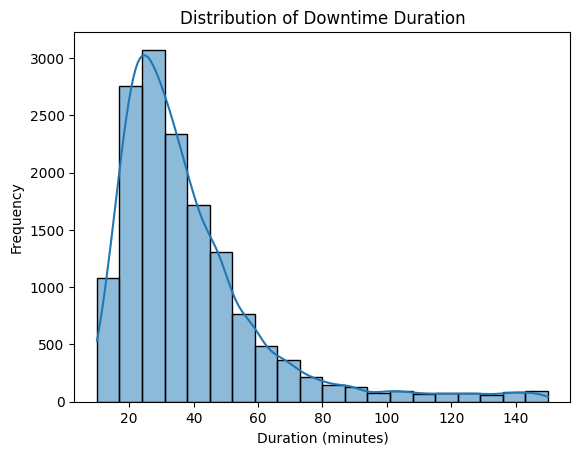

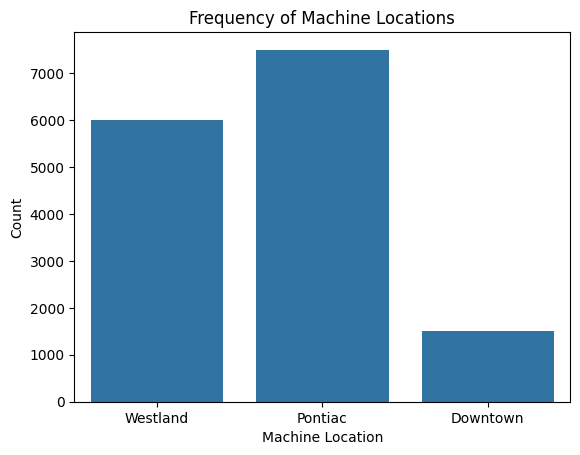

In [33]:


import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Downtime Duration
sns.histplot(df['Duration'], bins=20, kde=True)
plt.title('Distribution of Downtime Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


# Count plot for Machine Locations
sns.countplot(x='MachineLocation', data=df)
plt.title('Frequency of Machine Locations')
plt.xlabel('Machine Location')
plt.ylabel('Count')
plt.show()


### Check for missing values in each column


In [34]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 MachineType        0
Group              0
Code               0
Duration           0
StartTime          0
EndTime            0
MachineLocation    0
dtype: int64


If there are no missing values, we can proceed to the next step. If there are missing values, we can either drop the rows with missing values or fill them with the mean, median or mode of the column. Since this is a synthetic dataset, we will not have any missing values. However, in real-world datasets, missing values are common and need to be handled properly.

### Encode Categorical Variables
Now we need to convert the categorical variables into numerical format. We will use one-hot encoding for this purpose. One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. 

In [35]:
from sklearn.preprocessing import OneHotEncoder
import joblib  # For saving encoders

# OneHotEncode categorical variables
categorical_columns = ["MachineType", "Group", "Code", "MachineLocation"]

encoders = {}
for column in categorical_columns:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    transformed_data = encoder.fit_transform(df[[column]])
    encoded_df = pd.DataFrame(transformed_data, columns=encoder.get_feature_names_out([column]))
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(columns=[column], inplace=True)
    encoders[column] = encoder

# Save encoders for future use
for column, encoder in encoders.items():
    joblib.dump(encoder, f"{column}_encoder.pkl")

print("OneHotEncoding completed and encoders saved!")

# Display encoded DataFrame
print("\nEncoded DataFrame:")
print(df.head())

OneHotEncoding completed and encoders saved!

Encoded DataFrame:
   Duration  StartTime  EndTime  MachineType_Husky Injection Molder  \
0        30       1109     1139                                 1.0   
1       111        677      788                                 0.0   
2        36        337      373                                 1.0   
3        13       1225     1238                                 0.0   
4        35        600      635                                 1.0   

   MachineType_Krones Blowmolder  MachineType_Sidel Blowmolder  \
0                            0.0                           0.0   
1                            1.0                           0.0   
2                            0.0                           0.0   
3                            1.0                           0.0   
4                            0.0                           0.0   

   Group_Air System  Group_Color System  Group_Cooling System  \
0               0.0                 1.0       

### Save the encoders and scalers
For deployment, we will need to save the encoders and scalers so that we can preprocess the input data in the same way as the training data. We will save the encoders and scalers.

In [36]:
import joblib


# Save encoders
for column, encoder in encoders.items():
    joblib.dump(encoder, f"{column}_encoder.pkl")

print("Encoders saved successfully!")

Encoders saved successfully!


### Load the encoders

In [37]:
import joblib

# Load encoders
code_encoder = joblib.load("Code_encoder.pkl")
group_encoder = joblib.load("Group_encoder.pkl")
machinelocation_encoder = joblib.load("MachineLocation_encoder.pkl")
machinetype_encoder = joblib.load("MachineType_encoder.pkl")


In [38]:
# This is a test

# Example new data
new_data = pd.DataFrame({
    "Code": ["Broken Screw"],
    "Group": ["Screw Assembly"],
    "MachineLocation": ["Downtown"],
    "MachineType": ["Sidel Blowmolder"]
})

# Transform using loaded encoders
code_encoded = code_encoder.transform(new_data[["Code"]])
group_encoded = group_encoder.transform(new_data[["Group"]])
machinelocation_encoded = machinelocation_encoder.transform(new_data[["MachineLocation"]])
machinetype_encoded = machinetype_encoder.transform(new_data[["MachineType"]])

# Convert encoded data to DataFrames
code_df = pd.DataFrame(code_encoded, columns=code_encoder.get_feature_names_out(["Code"]))
group_df = pd.DataFrame(group_encoded, columns=group_encoder.get_feature_names_out(["Group"]))
machinelocation_df = pd.DataFrame(machinelocation_encoded, columns=machinelocation_encoder.get_feature_names_out(["MachineLocation"]))
machinetype_df = pd.DataFrame(machinetype_encoded, columns=machinetype_encoder.get_feature_names_out(["MachineType"]))

# Combine all encoded features
encoded_data = pd.concat([code_df, group_df, machinelocation_df, machinetype_df], axis=1)

print("\nEncoded New Data:")
print(encoded_data)


Encoded New Data:
   Code_Color Change  Code_Color Mismatch  Code_Glue Issue  \
0                0.0                  0.0              0.0   

   Code_High blow air pressure  Code_High pressure  Code_Hopper Jam  \
0                          0.0                 0.0              0.0   

   Code_Label Misalignment  Code_Label Tear  Code_Low blow air pressure  \
0                      0.0              0.0                         0.0   

   Code_Low pressure  ...  Group_Material Feed  Group_Mold Alignment  \
0                0.0  ...                  0.0                   0.0   

   Group_Pressure Control  Group_Surface Quality  MachineLocation_Downtown  \
0                     0.0                    0.0                       1.0   

   MachineLocation_Pontiac  MachineLocation_Westland  \
0                      0.0                       0.0   

   MachineType_Husky Injection Molder  MachineType_Krones Blowmolder  \
0                                 0.0                            0.0   

  

### Standardize the numerical features 
Standardization is the process of transforming data in such a way that the mean of each column becomes zero and the standard deviation becomes 1. This is important when we are working with features that have different units or scales. Standardization helps to bring all the features to a similar scale and makes the model training process more efficient.

In [39]:
# Check
print("Original ranges:")
print("Duration:", df['Duration'].min(), "to", df['Duration'].max())
print("StartTime:", df['StartTime'].min(), "to", df['StartTime'].max())
print("EndTime:", df['EndTime'].min(), "to", df['EndTime'].max())

Original ranges:
Duration: 10 to 150
StartTime: 0 to 1439
EndTime: 15 to 1586


In [40]:
import joblib
from sklearn.preprocessing import StandardScaler

df_encoded = df.copy()

# Numerical features
numerical_features = ['Duration', 'StartTime', 'EndTime']

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(df[numerical_features])


# Verify features if they dont exist
if not all(feature in df.columns for feature in numerical_features):
    raise ValueError(f"Missing numerical features. Available columns: {df.columns}")

scaler = StandardScaler()

# Fit and transform numerical features
df_encoded[numerical_features] = scaler.fit_transform(df[numerical_features])

# Save scaler for future use
joblib.dump(scaler, 'numerical_scaler.pkl')

# Verify standardization
print("\nStandardized features statistics:")
print(df_encoded[numerical_features].describe())


Standardized features statistics:
           Duration     StartTime       EndTime
count  1.500000e+04  1.500000e+04  1.500000e+04
mean  -1.146342e-16  3.221127e-17 -1.098973e-16
std    1.000033e+00  1.000033e+00  1.000033e+00
min   -1.205440e+00 -1.717684e+00 -1.771177e+00
25%   -6.563507e-01 -8.725463e-01 -8.675580e-01
50%   -2.762118e-01 -8.200878e-03 -4.686193e-03
75%    3.151155e-01  8.681494e-01  8.653762e-01
max    4.707832e+00  1.737297e+00  1.994300e+00


### Split the Dataset
We will split the dataset into training and testing sets. The training set will be used to train the model and the testing set will be used to evaluate the model. We will use 80% of the data for training and 20% for testing.

In [41]:
from sklearn.model_selection import train_test_split

# Cant find group and code directly!!
target_columns = [col for col in df_encoded.columns if col.startswith('Group_') or col.startswith('Code_')]

# Separate features and targets
X = df_encoded.drop(columns=target_columns) # Contains all the features the model can use to make the predicitons (not group and code)
y = df_encoded[target_columns] # Contains the columns we want to make prediction on (Group and Code)

# Split with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFeature columns:", X.columns.tolist())
print("\nTarget columns:", y.columns.tolist())

Training set shape: (12000, 9)
Testing set shape: (3000, 9)

Feature columns: ['Duration', 'StartTime', 'EndTime', 'MachineType_Husky Injection Molder', 'MachineType_Krones Blowmolder', 'MachineType_Sidel Blowmolder', 'MachineLocation_Downtown', 'MachineLocation_Pontiac', 'MachineLocation_Westland']

Target columns: ['Group_Air System', 'Group_Color System', 'Group_Cooling System', 'Group_Feed Section', 'Group_Filling Station', 'Group_Labeling Unit', 'Group_Material Feed', 'Group_Mold Alignment', 'Group_Pressure Control', 'Group_Surface Quality', 'Code_Color Change', 'Code_Color Mismatch', 'Code_Glue Issue', 'Code_High blow air pressure', 'Code_High pressure', 'Code_Hopper Jam', 'Code_Label Misalignment', 'Code_Label Tear', 'Code_Low blow air pressure', 'Code_Low pressure', 'Code_Material Feed Issue', 'Code_Material Jam', 'Code_Mold Damage', 'Code_Mold Misalignment', 'Code_Overflow', 'Code_Overheat', 'Code_Spillage', 'Code_Underfill', 'Code_Underheat']


## Model Selection and Training
We will use the Decision Tree Classifier which is a supervised learning algorithm used for classification and regression task. It works for both categorical and continuous input and output variables. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. It is a white box type of ML algorithm. In this project, we will use the DecisionTreeClassifier from the scikit-learn library. 

### Preparing the Data for Modeling

In [42]:
""" from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
base_clf = DecisionTreeClassifier(random_state=42)

# Wrap it in a MultiOutputClassifier to handle multiple targets
clf = MultiOutputClassifier(base_clf)

# Fit the classifier on the training data
clf.fit(X_train, y_train) """

from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize RandomForestClassifier
base_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap it in MultiOutputClassifier
clf = MultiOutputClassifier(base_clf)

# Fit the classifier
clf.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

## Evaluation

### Group Prediction

In [43]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Predict on the test data
y_pred = clf.predict(X_test)

# Convert predicitons as Dataframe and fill in data 
y_pred = pd.DataFrame(y_pred, columns=y_test.columns, index=y_test.index)

# Calculate the accuracy for each target variable
for col in y_test.columns:
    accuracy_percentage = accuracy_score(y_test[col], y_pred[col]) * 100
    print(f"Accuracy for {col} is {accuracy_percentage:.2f}%")

for col in y_test.columns:
    print(f"\nClassification Report for {col}:")
    print(classification_report(y_test[col], y_pred[col]))



Accuracy for Group_Air System is 89.90%
Accuracy for Group_Color System is 87.43%
Accuracy for Group_Cooling System is 90.77%
Accuracy for Group_Feed Section is 89.93%
Accuracy for Group_Filling Station is 87.90%
Accuracy for Group_Labeling Unit is 91.70%
Accuracy for Group_Material Feed is 87.83%
Accuracy for Group_Mold Alignment is 93.90%
Accuracy for Group_Pressure Control is 89.30%
Accuracy for Group_Surface Quality is 87.17%
Accuracy for Code_Color Change is 93.27%
Accuracy for Code_Color Mismatch is 93.50%
Accuracy for Code_Glue Issue is 93.87%
Accuracy for Code_High blow air pressure is 94.33%
Accuracy for Code_High pressure is 93.83%
Accuracy for Code_Hopper Jam is 93.50%
Accuracy for Code_Label Misalignment is 94.63%
Accuracy for Code_Label Tear is 93.67%
Accuracy for Code_Low blow air pressure is 93.87%
Accuracy for Code_Low pressure is 94.33%
Accuracy for Code_Material Feed Issue is 89.83%
Accuracy for Code_Material Jam is 94.23%
Accuracy for Code_Mold Damage is 99.43%
Accur

**Results Rundown**

Since our dataset is very small (15000) and syntatically generated, our model is not very good enough at accurately predicitng the group/code for a record, but it is faily good at predicting if a group/ code DOES NOT belong to a record.

For instance, looking at the Group_Air System report, we identitfy that the 94% of the time the model correctly predicts that the record does not belong to the "Air System" and 93% of the time it was correctly identified. But when the sample actually belongs to the "Air System" group, the model predicts that correctly only 44% and 47% of the time it is right. 

Yet, we can still levarage the combination of these two predictions to perform some opperations correctly.



#### Confusion Matrix
The confusion matrix shows the number of true positives, true negatives, false positives and false negatives. It is a useful tool for understanding the performance of the model. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the model. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

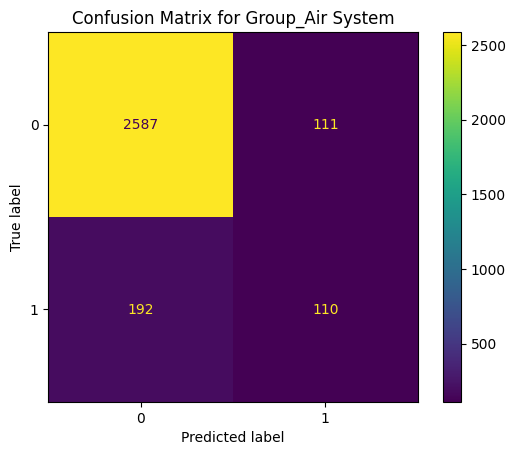

Confusion Matrix for Group_Air System:
True Negatives (TN): 2587
False Positives (FP): 111
False Negatives (FN): 192
True Positives (TP): 110



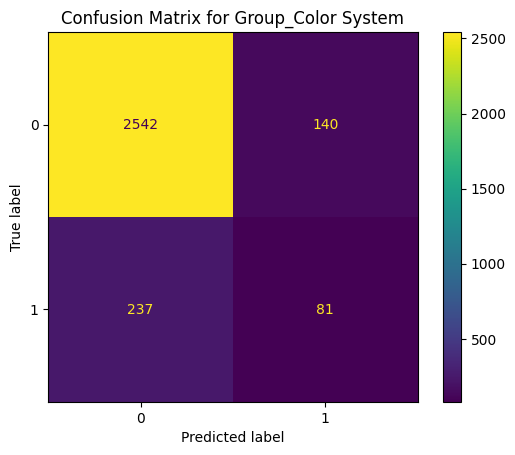

Confusion Matrix for Group_Color System:
True Negatives (TN): 2542
False Positives (FP): 140
False Negatives (FN): 237
True Positives (TP): 81



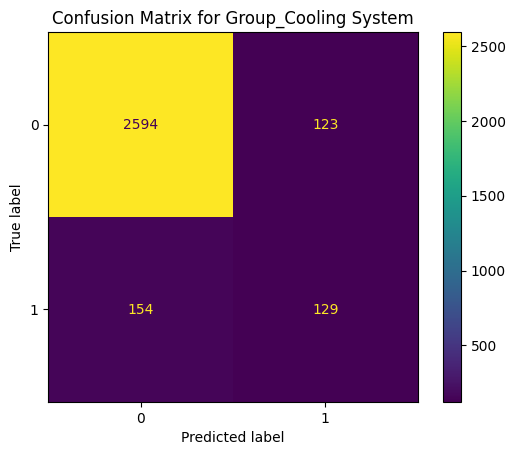

Confusion Matrix for Group_Cooling System:
True Negatives (TN): 2594
False Positives (FP): 123
False Negatives (FN): 154
True Positives (TP): 129



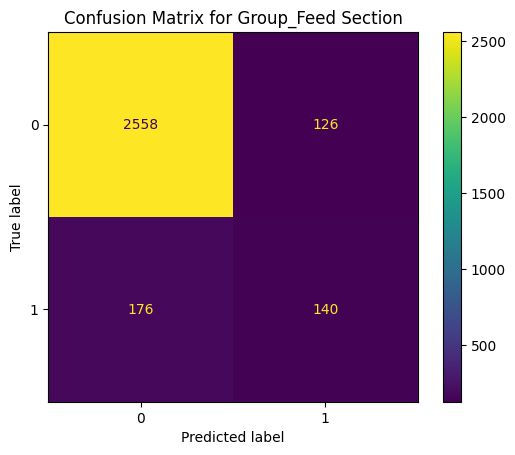

Confusion Matrix for Group_Feed Section:
True Negatives (TN): 2558
False Positives (FP): 126
False Negatives (FN): 176
True Positives (TP): 140



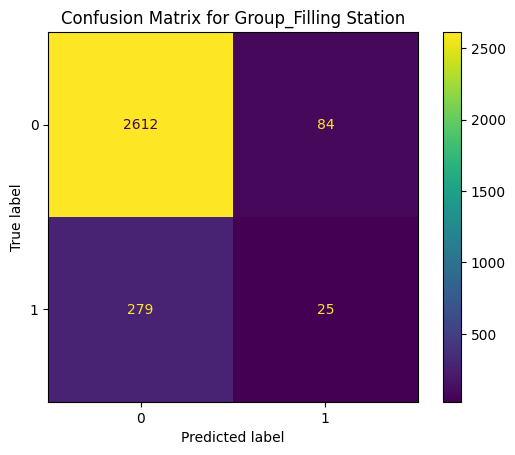

Confusion Matrix for Group_Filling Station:
True Negatives (TN): 2612
False Positives (FP): 84
False Negatives (FN): 279
True Positives (TP): 25



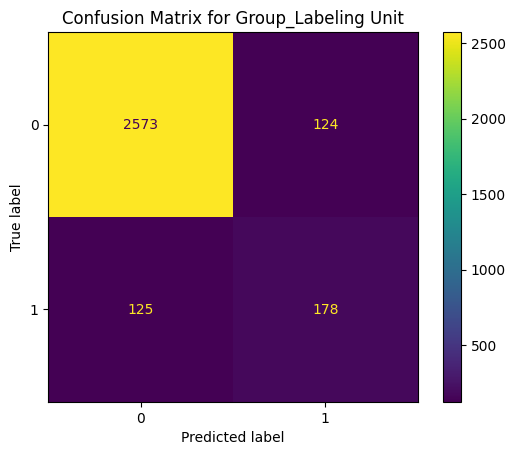

Confusion Matrix for Group_Labeling Unit:
True Negatives (TN): 2573
False Positives (FP): 124
False Negatives (FN): 125
True Positives (TP): 178



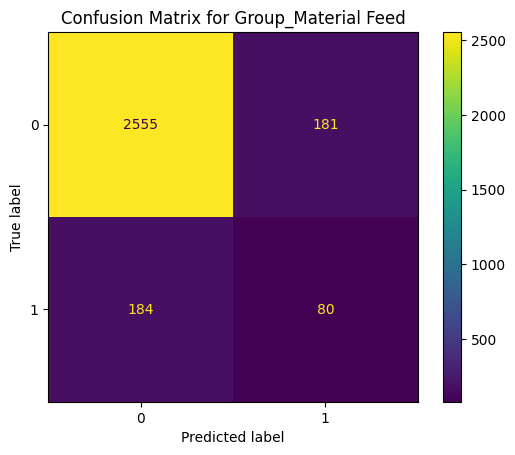

Confusion Matrix for Group_Material Feed:
True Negatives (TN): 2555
False Positives (FP): 181
False Negatives (FN): 184
True Positives (TP): 80



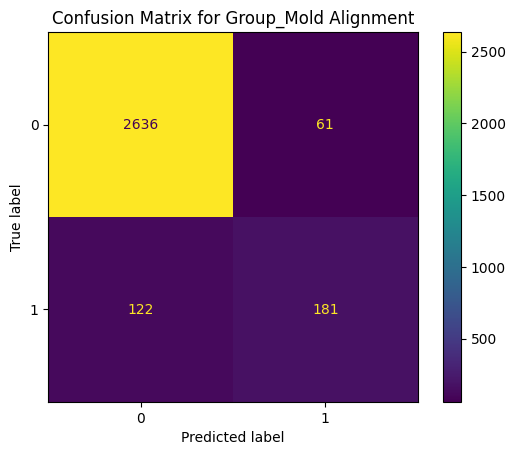

Confusion Matrix for Group_Mold Alignment:
True Negatives (TN): 2636
False Positives (FP): 61
False Negatives (FN): 122
True Positives (TP): 181



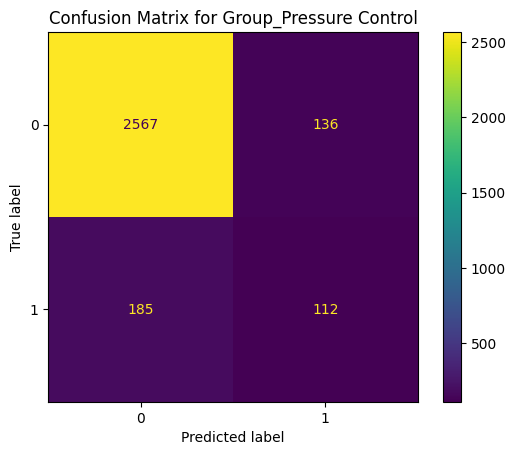

Confusion Matrix for Group_Pressure Control:
True Negatives (TN): 2567
False Positives (FP): 136
False Negatives (FN): 185
True Positives (TP): 112



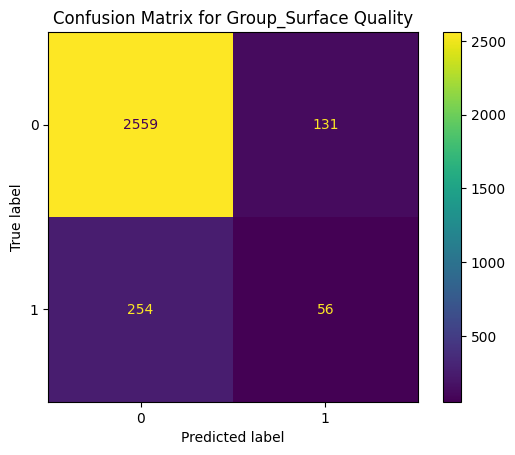

Confusion Matrix for Group_Surface Quality:
True Negatives (TN): 2559
False Positives (FP): 131
False Negatives (FN): 254
True Positives (TP): 56



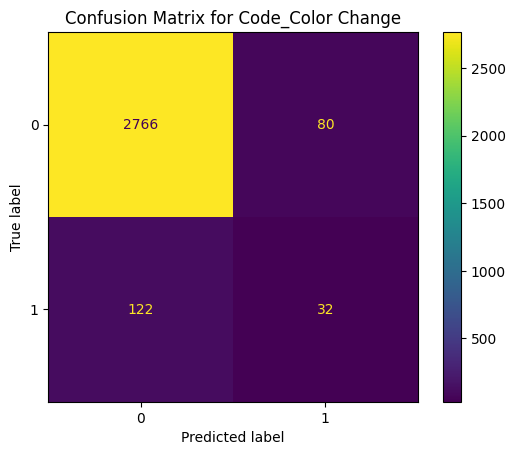

Confusion Matrix for Code_Color Change:
True Negatives (TN): 2766
False Positives (FP): 80
False Negatives (FN): 122
True Positives (TP): 32



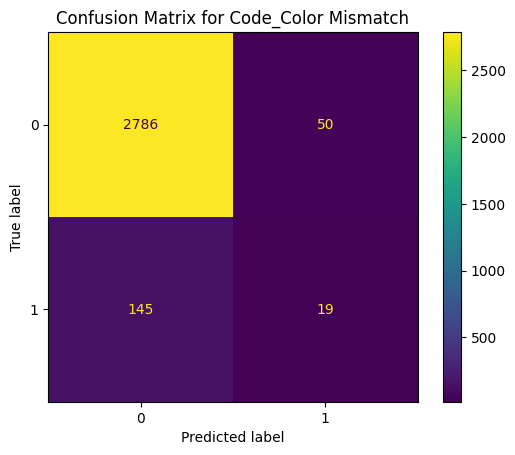

Confusion Matrix for Code_Color Mismatch:
True Negatives (TN): 2786
False Positives (FP): 50
False Negatives (FN): 145
True Positives (TP): 19



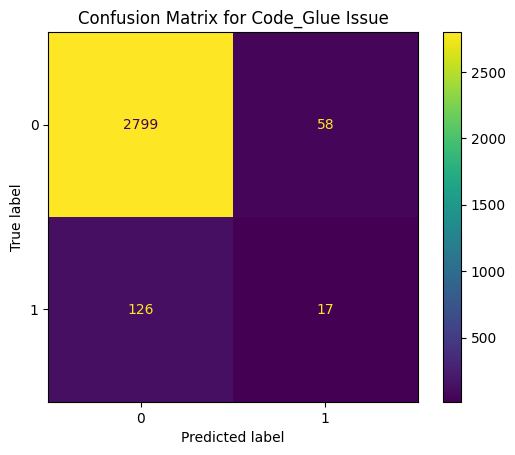

Confusion Matrix for Code_Glue Issue:
True Negatives (TN): 2799
False Positives (FP): 58
False Negatives (FN): 126
True Positives (TP): 17



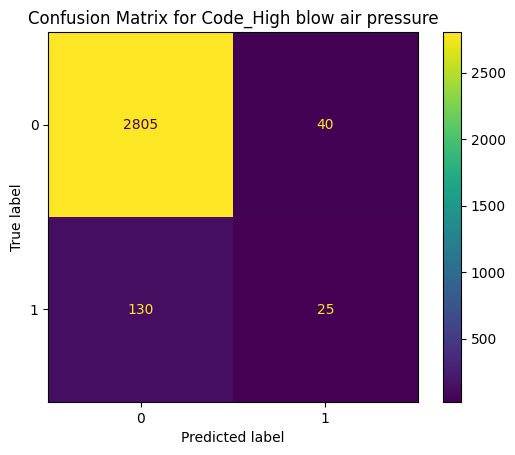

Confusion Matrix for Code_High blow air pressure:
True Negatives (TN): 2805
False Positives (FP): 40
False Negatives (FN): 130
True Positives (TP): 25



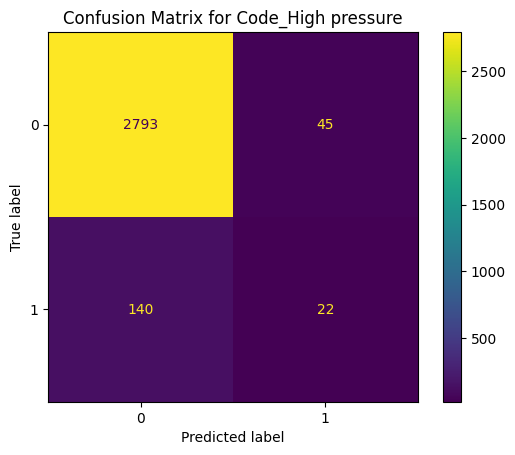

Confusion Matrix for Code_High pressure:
True Negatives (TN): 2793
False Positives (FP): 45
False Negatives (FN): 140
True Positives (TP): 22



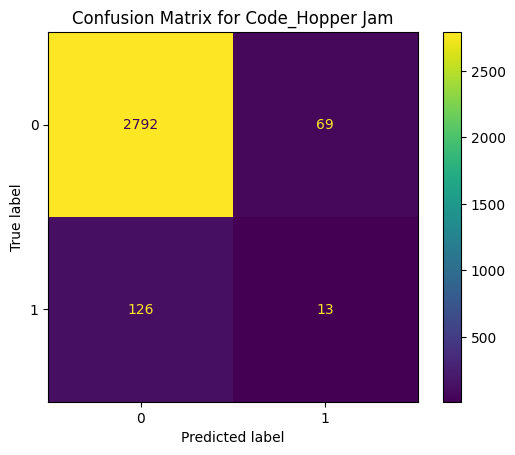

Confusion Matrix for Code_Hopper Jam:
True Negatives (TN): 2792
False Positives (FP): 69
False Negatives (FN): 126
True Positives (TP): 13



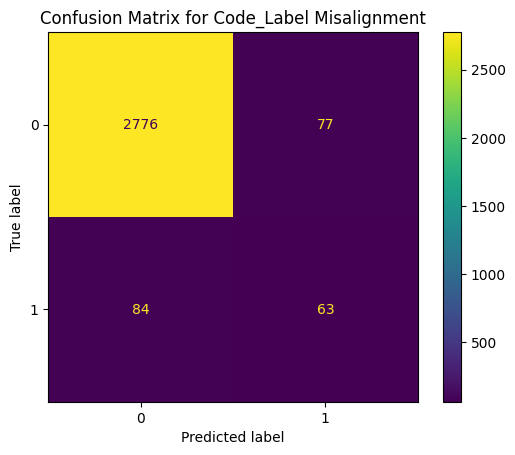

Confusion Matrix for Code_Label Misalignment:
True Negatives (TN): 2776
False Positives (FP): 77
False Negatives (FN): 84
True Positives (TP): 63



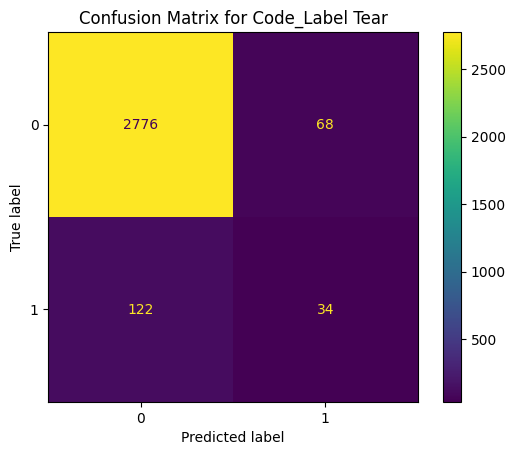

Confusion Matrix for Code_Label Tear:
True Negatives (TN): 2776
False Positives (FP): 68
False Negatives (FN): 122
True Positives (TP): 34



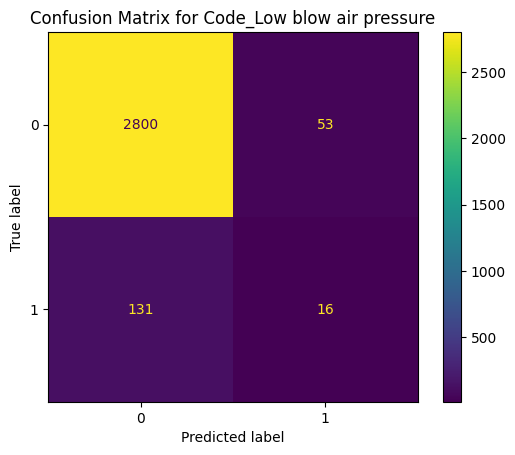

Confusion Matrix for Code_Low blow air pressure:
True Negatives (TN): 2800
False Positives (FP): 53
False Negatives (FN): 131
True Positives (TP): 16



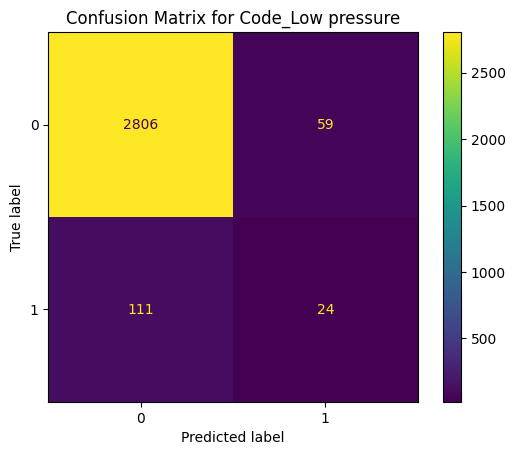

Confusion Matrix for Code_Low pressure:
True Negatives (TN): 2806
False Positives (FP): 59
False Negatives (FN): 111
True Positives (TP): 24



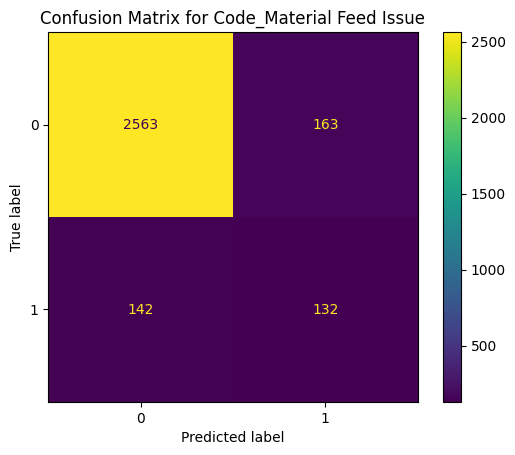

Confusion Matrix for Code_Material Feed Issue:
True Negatives (TN): 2563
False Positives (FP): 163
False Negatives (FN): 142
True Positives (TP): 132



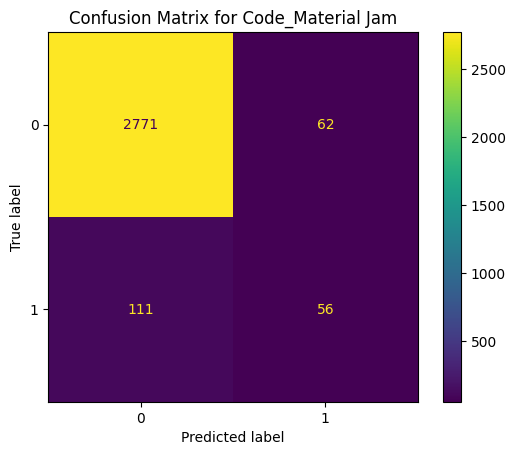

Confusion Matrix for Code_Material Jam:
True Negatives (TN): 2771
False Positives (FP): 62
False Negatives (FN): 111
True Positives (TP): 56



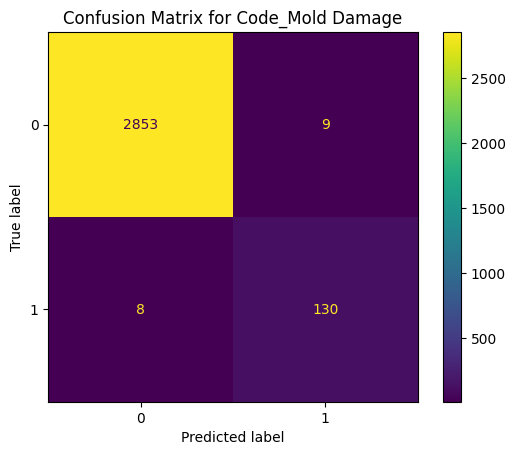

Confusion Matrix for Code_Mold Damage:
True Negatives (TN): 2853
False Positives (FP): 9
False Negatives (FN): 8
True Positives (TP): 130



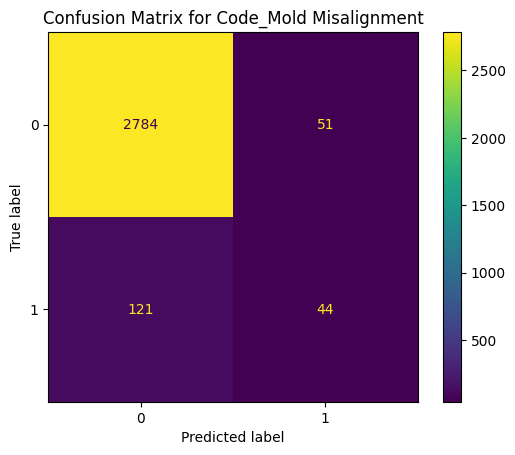

Confusion Matrix for Code_Mold Misalignment:
True Negatives (TN): 2784
False Positives (FP): 51
False Negatives (FN): 121
True Positives (TP): 44



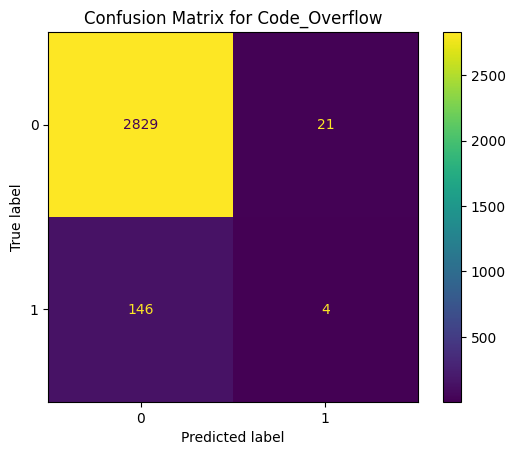

Confusion Matrix for Code_Overflow:
True Negatives (TN): 2829
False Positives (FP): 21
False Negatives (FN): 146
True Positives (TP): 4



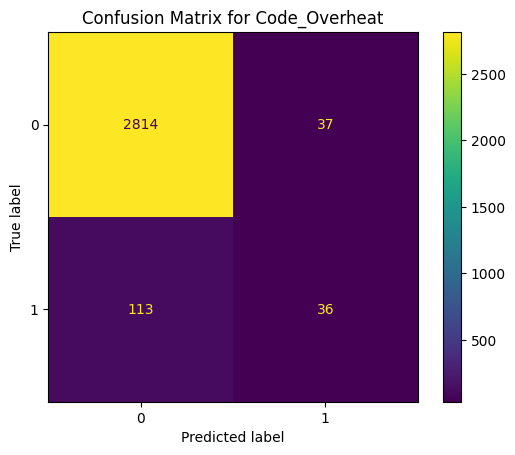

Confusion Matrix for Code_Overheat:
True Negatives (TN): 2814
False Positives (FP): 37
False Negatives (FN): 113
True Positives (TP): 36



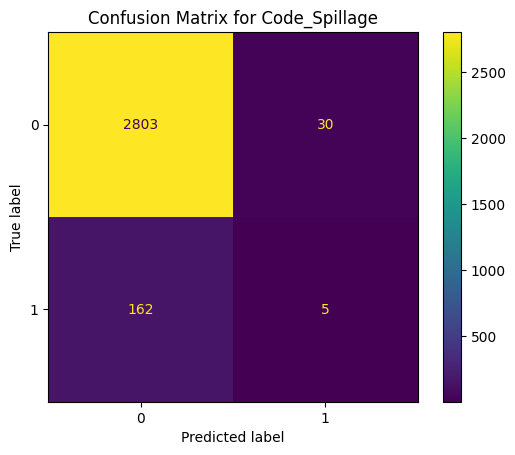

Confusion Matrix for Code_Spillage:
True Negatives (TN): 2803
False Positives (FP): 30
False Negatives (FN): 162
True Positives (TP): 5



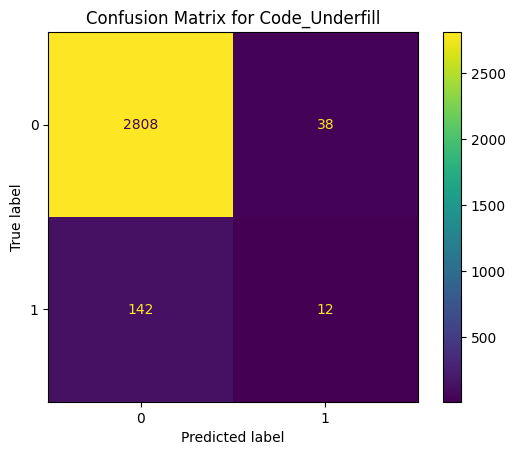

Confusion Matrix for Code_Underfill:
True Negatives (TN): 2808
False Positives (FP): 38
False Negatives (FN): 142
True Positives (TP): 12



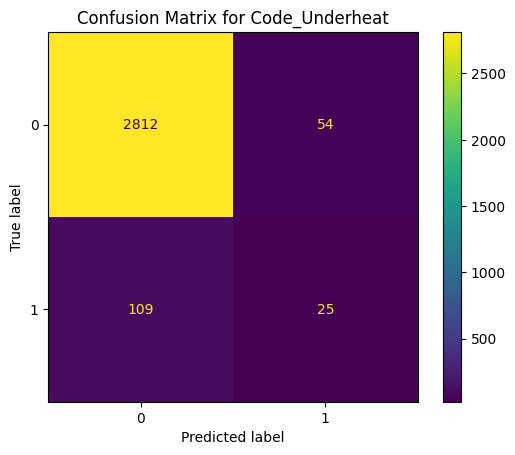

Confusion Matrix for Code_Underheat:
True Negatives (TN): 2812
False Positives (FP): 54
False Negatives (FN): 109
True Positives (TP): 25



In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Predict on the test data
y_pred = clf.predict(X_test)

# Convert predictions to DataFrame
y_pred = pd.DataFrame(y_pred, columns=y_test.columns, index=y_test.index)

# For each target variable, compute and display the confusion matrix
for col in y_test.columns:
    cm = confusion_matrix(y_test[col], y_pred[col])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f'Confusion Matrix for {col}')
    plt.show()
    
    # Extract true negatives, false positives, false negatives, true positives
    tn, fp, fn, tp = cm.ravel()
    print(f'Confusion Matrix for {col}:')
    print(f'True Negatives (TN): {tn}')
    print(f'False Positives (FP): {fp}')
    print(f'False Negatives (FN): {fn}')
    print(f'True Positives (TP): {tp}\n')

## Interpretation
Lets identify the important features that contribute to the prediction of the Group and Code of the downtime event. We can visualize the model to understand how the model is making predictions.

#### Group Prediction

In [45]:
import pandas as pd

# Get the feature names
feature_names = X_train.columns

# Iterate over each estimator and target variable
for estimator, target in zip(clf.estimators_, y_train.columns):
    # Get feature importances
    importances = estimator.feature_importances_
    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    # Sort by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # Display the top features
    print(f"\nTop features for predicting '{target}':")
    print(importance_df.head(10))


Top features for predicting 'Group_Air System':
                              Feature  Importance
0                            Duration    0.249251
2                             EndTime    0.248158
1                           StartTime    0.247142
6            MachineLocation_Downtown    0.125285
7             MachineLocation_Pontiac    0.082107
8            MachineLocation_Westland    0.031093
4       MachineType_Krones Blowmolder    0.005751
5        MachineType_Sidel Blowmolder    0.005662
3  MachineType_Husky Injection Molder    0.005551

Top features for predicting 'Group_Color System':
                              Feature  Importance
2                             EndTime    0.310874
1                           StartTime    0.310035
0                            Duration    0.208974
8            MachineLocation_Westland    0.089209
7             MachineLocation_Pontiac    0.056611
6            MachineLocation_Downtown    0.013576
4       MachineType_Krones Blowmolder    0.003649


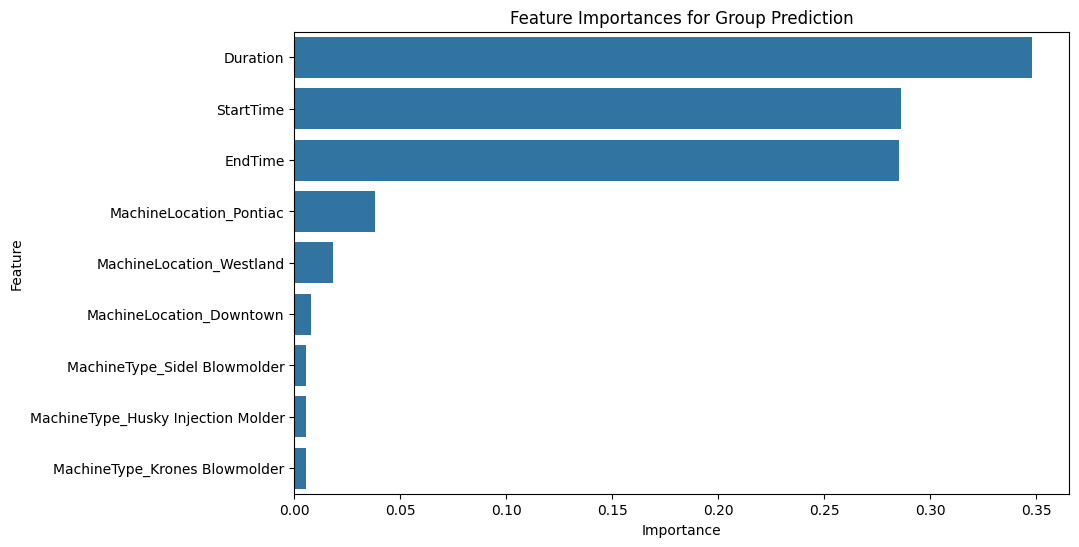

In [46]:
# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Group Prediction')
plt.show()


## Code Prediction

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clf is a MultiOutput model, e.g., RandomForestClassifier
code_importances = {}

# Loop through each estimator and target
for estimator, target in zip(clf.estimators_, y_train.columns):
    if target.startswith('Code_'):  # Process only Code-related targets
        # Get feature importances
        importances = estimator.feature_importances_
        
        # Store the importances in a dictionary
        code_importances[target] = pd.Series(importances, index=feature_names)
        
        # Create a DataFrame for visualization
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        
        # Display the top features for the current target
        print(f"\nTop features for predicting '{target}':")
        print(importance_df.head(7))





Top features for predicting 'Code_Color Change':
                              Feature  Importance
2                             EndTime    0.326089
1                           StartTime    0.324602
0                            Duration    0.257277
8            MachineLocation_Westland    0.047372
7             MachineLocation_Pontiac    0.024614
3  MachineType_Husky Injection Molder    0.005869
5        MachineType_Sidel Blowmolder    0.005158

Top features for predicting 'Code_Color Mismatch':
                        Feature  Importance
2                       EndTime    0.330463
1                     StartTime    0.327359
0                      Duration    0.242491
8      MachineLocation_Westland    0.048748
7       MachineLocation_Pontiac    0.026951
6      MachineLocation_Downtown    0.009621
5  MachineType_Sidel Blowmolder    0.005520

Top features for predicting 'Code_Glue Issue':
                         Feature  Importance
1                      StartTime    0.333520
2       

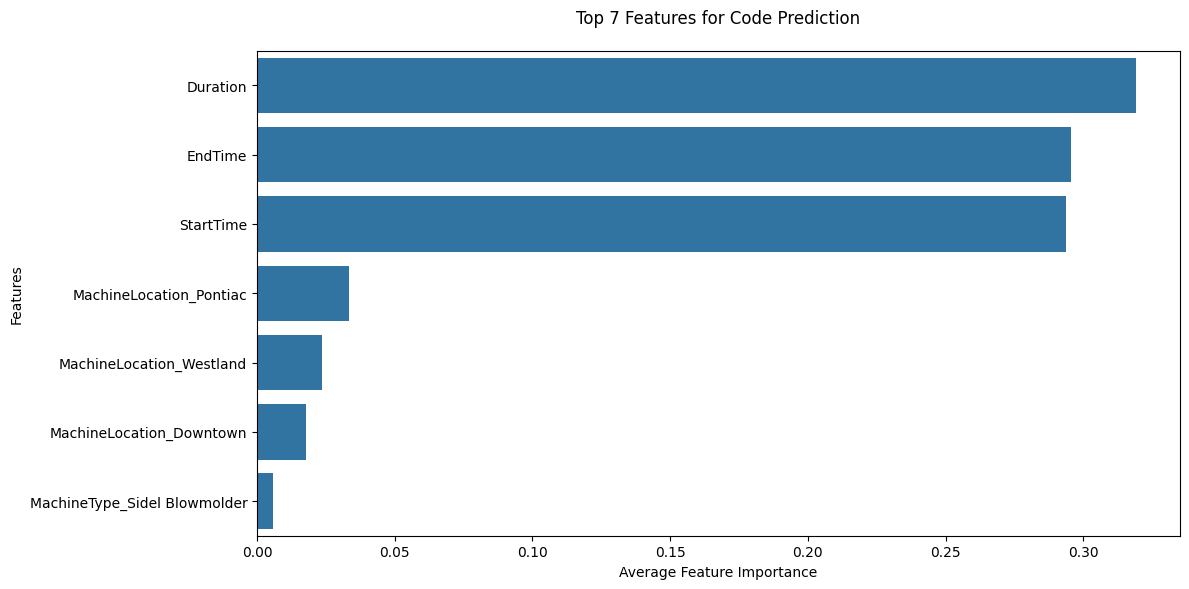

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Get feature importances for Code prediction
code_importances = {}
for estimator, target in zip(clf.estimators_, y_train.columns):
    if target.startswith('Code_'):  # Only process Code-related targets
        importances = estimator.feature_importances_
        code_importances[target] = pd.Series(importances, index=feature_names)

# Create a DataFrame with average importance across all Code predictions
avg_importances = pd.DataFrame(code_importances).mean(axis=1)
importance_df = pd.DataFrame({
    'Feature': avg_importances.index,
    'Average Importance': avg_importances.values
})


# Sort by importance and get top 7 features
importance_df = importance_df.sort_values('Average Importance', ascending=False)
top_features = importance_df.head(7)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_features, x='Average Importance', y='Feature')
plt.title('Top 7 Features for Code Prediction', pad=20)
plt.xlabel('Average Feature Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

## Visualize the Prediction Model
Since visualizing the entire decision tree can be overwhelming, we can visualize a smaller tree by setting the max_depth parameter of the DecisionTreeClassifier. This will limit the depth of the tree and make it easier to visualize.

Note: Visualization requires the graphviz library to be installed in the system and added to the PATH. You can install it from the official website: [https://graphviz.org/download/](https://graphviz.gitlab.io/download/)

In [53]:
from sklearn.tree import export_graphviz
import graphviz

# Extract a single tree from the Random Forest
tree = clf.estimators_[0].estimators_[0]

# Export the tree to a Graphviz format
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=feature_names,  
                           class_names=target_columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Visualize the tree using graphviz
graph = graphviz.Source(dot_data)  
graph.render("random_forest_tree")  # Save the tree as a PDF file
graph.view()  # View the tree

'random_forest_tree.pdf'

After the random forest tree pdf is generated, you can open it in a pdf viewer to visualize the tree. Now, we can extract the decision rules from the tree to understand how the model is making predictions.

# Deployment
We will save the model and use it for simple prediciton

In [51]:
# In Z4Classifier.ipynb
import joblib

# Save the trained model
joblib.dump(clf, 'Z4Model.pkl')

# Save feature names
feature_names_df = pd.DataFrame({'features': X_train.columns})
feature_names_df.to_csv('feature_names.csv', index=False)

# Save target column names
target_names_df = pd.DataFrame({'targets': y_train.columns})
target_names_df.to_csv('target_names.csv', index=False)